# Практическая работа №2: Исследование однородного линейного уравнения с периодическими коэффициентами

Выполнил студент гр. 9382 Павлов Роман, вариант 28.

## Цель работы

Изучение устойчивости однородного линейного уравнения с периодическими коэффициентами при $t \to \infty$.

## Основные теоретические положения

Линейная однородная система с периодическими коэффициентами - это система ОЛДУ следующего вида:

$X' = A(t)X,\ A(t + T) = A(t), t \ge 0$
(1)

Матрица\
$\Phi(t) = \{\phi_{ij}, i, j = 1, 2, ..., n \}$\
называется <b>фундаментальной матрицей</b> системы (1), если все её столбцы являются линейно независимыми решениями этой системы.

Матрица $C$, удовлетворяющая условию\
$\Phi(t + T) = \Phi(t)C, \forall t \ge 0$,\
называется <b>основной</b> для фундаментальной матрицы $\Phi(t)$.

<b>Спектральным радиусом</b> матрицы $A$ называется максимум модуля её собственных чисел:\
$\rho(A) = max|\lambda_j|, 0 \le j \le n$

## Постановка задачи

Дано дифференциальное уравнение:\
$x'' + a(p, t)x = 0, a(p, t) = p + b(t), b(t + T) = b(t)$,\
где $p$ – параметр.

Данное уравнение сводится к системе двух уравнений $1$-го порядка:\
$\begin{cases}
    u_1' = u_2\\
    u_2' = -a(p, t)u_1
 \end{cases}$
 
Здесь $u_1(t) = x(t), u_2(t) = x'(t)$.

Необходимо провести исследование устойчивости однородного линейного уравнения.

## Выполнение работы

In [1]:
import numpy as np
import matplotlib.pyplot as pt
from scipy.integrate import odeint
from math import pi, sin, cos

Реализованный ниже алгоритм проходит по всем значениям $p$ от $0$ до $20$ с шагом $0.05$, и для каждого такого значения находится фундаментальная матрица, из которой впоследствии будут получены столбцы основной матрицы. Наибольшее по модулю собственное число основной матрицы - это и есть её спектральный радиус.

По значениям спектральных радиусов строится график, из которого видно, в какой точке находится граница между зоной устойчивости и зоной неустойчивости системы.

p0: 8.4


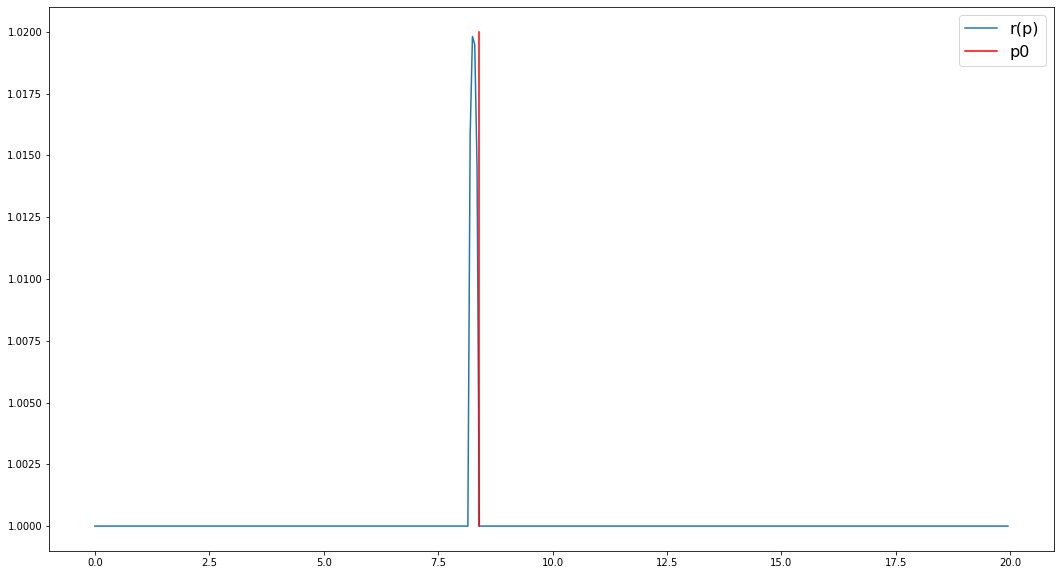

In [2]:
pRange = np.arange(0.0, 20.0, 0.05)
pVals = []
p0 = None

v1 = [1, 0]
v2 = [0, 1]

T = pi/3
t = np.arange(0.0, T, T/500)

# Построение графика спектрального радиуса
for p in pRange:
    # Система уравнений
    u_sol = lambda x, dt: [x[1], -(p + cos(sin(3*dt)))*x[0]]
    # Столбцы фундаментальной матрицы
    u1 = odeint(u_sol, v1, t)
    u2 = odeint(u_sol, v2, t)
    # Основная матрица
    C = np.matrix([u1[-1], u2[-1]]).transpose()
    # Спектральный радиус
    sr = np.max(np.abs(np.linalg.eigvals(C)))
    
    pVals.append(sr)

# Поиск точки p0
for i in range(len(pVals)):
    if pVals[-1-i] > 1:
        p0 = pRange[-i]
        break

print("p0:", p0)
pVals = np.array(pVals)

pt.figure(figsize=(18, 10))
pt.plot(pRange, pVals, label="r(p)")
pt.plot([p0, p0], [1.0, 1.02], color="red", label="p0")
pt.legend(prop = {"size": 16})
pt.show()

## Выводы

В ходе работы ОЛДУ с периодическими коэффициентами исследовано на устойчивость. Найдена граница между зонами устойчивости и неустойчивости.